In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

import tifffile


In [ ]:
f = h5py.File(r"X:\Angio\2022-11-22_145205\uni_tp-0_ch-1_st-0-x00-y00_obj-right_cam-right_etc.lux.h5", "r+")
print(list(f.keys()))
d = f['Data']
print(d.shape)

data = da.from_array(d, chunks =(64,64,64))
subv = data[6:128,0:512,0:512] # do not modify - original cut

In [ ]:
with h5py.File("ch-1_subv.h5", "w") as f:
    dset = f.create_dataset("subv", subv.shape, dtype='uint16')
    dset.write_direct(subv)

In [4]:
datapath = '/group/dl4miacourse/The_Segmenters/Data/'

In [6]:
f = h5py.File(datapath + 'ch-1_subv.h5')
print(list(f.keys()))
d = f['subv']
subv = np.array(d)

['subv']


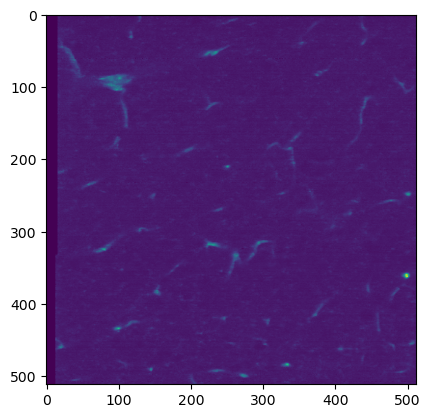

In [17]:
plt.imshow(subv[0,:,:])

In [24]:
import napari

viewer = napari.view_image(subv, colormap='magma')

In [22]:
label = tifffile.imread(datapath + 'ch-1_subv_labkit_opened_np_cleaned.tiff')

In [25]:
labels_layer = viewer.add_labels(label, name='segmentation')